In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [59]:
train = pd.read_csv(r"C:\Users\Mgh59\OneDrive\Escritorio\Clave Python SQL\Portafolio\Regresion Lineal\train.csv")
test = pd.read_csv(r"C:\Users\Mgh59\OneDrive\Escritorio\Clave Python SQL\Portafolio\Regresion Lineal\test.csv")

train.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [60]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [92]:
# Eliminar columnas innecesarias
train = train.drop(columns='Alley', errors='ignore')
test = test.drop(columns='Alley', errors='ignore')

In [93]:
# Imputación de valores nulos
for col in train.select_dtypes(include=[np.number]).columns:
    train[col].fillna(train[col].mean(), inplace=True)
    if col in test.columns:
        test[col].fillna(test[col].mean(), inplace=True)

C:\Users\Mgh59\AppData\Local\Temp\ipykernel_29492\2451794585.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mean(), inplace=True)
C:\Users\Mgh59\AppData\Local\Temp\ipykernel_29492\2451794585.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [94]:
# Codificar variables categóricas
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [95]:
# Alinear columnas de train y test
train, test = train.align(test, join='left', axis=1, fill_value=0)

In [96]:
# Separar features y target
X = train.drop(columns=['SalePrice', 'Id'], errors='ignore')
y = train['SalePrice']

In [97]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
# Modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)
y_pred = modelo.predict(X_test_scaled)

In [100]:
# Métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [101]:
print(f"MSE  (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R²   (Coeficiente de Determinación): {r2:.3f}")

MSE  (Error Cuadrático Medio): 1588229760.73
RMSE (Raíz del Error Cuadrático Medio): 39852.60
R²   (Coeficiente de Determinación): 0.799


In [102]:
# Variables más correlacionadas con SalePrice
num_features = X.columns
corr = train[num_features].corrwith(train['SalePrice']).sort_values(ascending=False)
print("\nTop 10 variables más correlacionadas con el precio:")
print(corr.head(10))


Top 10 variables más correlacionadas con el precio:
OverallQual     0.797881
GrLivArea       0.705154
GarageCars      0.647034
GarageArea      0.619330
TotalBsmtSF     0.615612
1stFlrSF        0.607969
FullBath        0.566627
TotRmsAbvGrd    0.547067
YearBuilt       0.525394
YearRemodAdd    0.521253
dtype: float64


C:\Users\Mgh59\AppData\Local\Temp\ipykernel_29492\3497358730.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', color='#ffd100')  # línea ideal


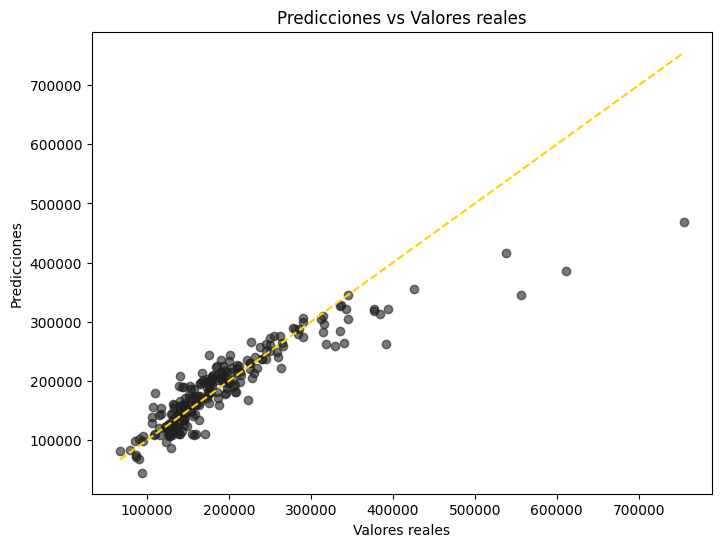

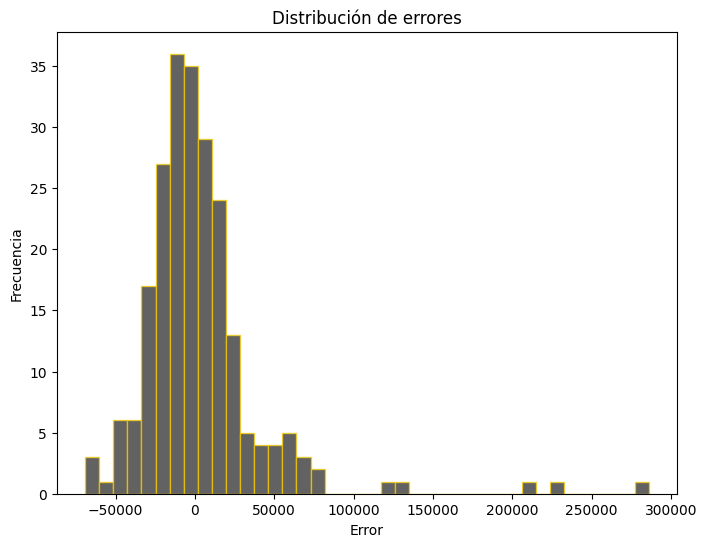

In [105]:
import matplotlib.pyplot as plt

# Predicciones vs Valores reales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='#202020')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', color='#ffd100')  # línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores reales")
plt.show()

# Gráfico: Distribución de errores (residuals)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=40, color='#202020', edgecolor='#ffd100', alpha=0.7)
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.title("Distribución de errores")
plt.show()


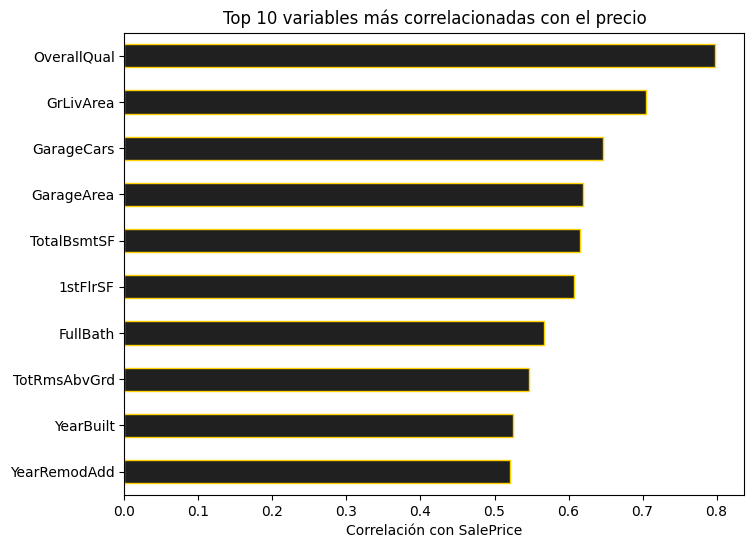

In [106]:
# Top 10 variables más correlacionadas con SalePrice
top10_corr = corr.head(10)

plt.figure(figsize=(8,6))
top10_corr.sort_values().plot(kind='barh', color='#202020', edgecolor='#ffd100')
plt.xlabel("Correlación con SalePrice")
plt.title("Top 10 variables más correlacionadas con el precio")
plt.show()